In [1]:
from MLpipeline.data_cleaning import build_data_frame
from MLpipeline.s3_data_ingestion import download_data #for when storing data through AWS - Amazon S3 bucket
from MLpipeline.preprocessing import preprocessor
from MLpipeline.train_model import train
from MLpipeline.predict import model_predictions
# from MLpipeline.write_df_to_bucket import writeDF

import numpy as np

### Using an S3 bucket with access codes and a bucket location

In [2]:
# df = download_data(access_file='portfolio-access_accessKeys.csv',bucket='portfolio-overview-ns25',object_key='data/nba_totals_agg.csv', region='us-east-1')

In [3]:
df_totals, df_aggregated = build_data_frame("data_files")
df_aggregated.head()

,Player,Age,Year,Tm,Pos,G,GS,MP,FG,FGA,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,A.J. Green,23,2023,MIL,SG,35,1,345,53,125,...,4,6,39,45,22,6,0,9,31,154
1,A.J. Green,25,2024,MIL,SG,73,7,1659,182,424,...,27,18,156,174,108,37,7,40,157,541
2,A.J. Lawson,22,2023,DAL,SG,15,0,108,22,44,...,8,6,15,21,2,2,0,3,11,56
3,A.J. Lawson,24,2024,TOR,SG,26,2,486,80,190,...,63,20,66,86,31,13,6,15,44,236
4,AJ Griffin,19,2023,ATL,SF,72,12,1401,248,533,...,47,37,116,153,73,42,12,42,87,639


# Total feature and target data with label encoder

X - features - player season statistics

y - target - player position

le - label encoder to label nominal variables as integers

In [4]:
X,y,le = preprocessor(df_aggregated)

In [5]:
model, X_train, y_train, X_val, y_val, X_test, y_test = train(X,y)

Predictions saved to: output\predictions.csv
Precision (macro): 0.6290187465790915
Recall (macro): 0.6377495889123797
F1 Score (macro): 0.6308768570372909
Precision (weighted): 0.6281661096764394

Classification Report:
               precision    recall  f1-score   support

           C       0.81      0.81      0.81        42
          PF       0.49      0.49      0.49        45
          PG       0.74      0.86      0.80        43
          SF       0.47      0.36      0.41        42
          SG       0.64      0.67      0.65        55

    accuracy                           0.64       227
   macro avg       0.63      0.64      0.63       227
weighted avg       0.63      0.64      0.63       227



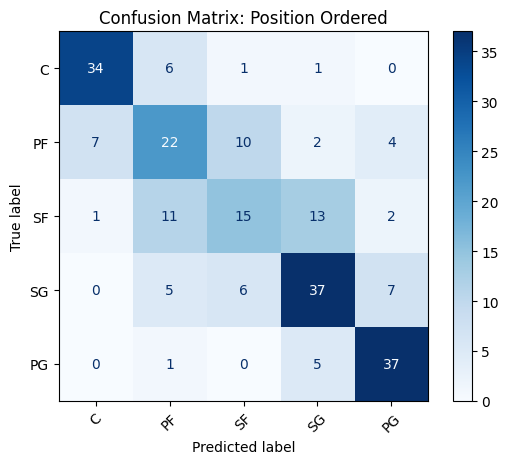

In [6]:
y_proba, predictions_df = model_predictions(model, X_test,y_test,le, save_dir=r'output')